In [38]:
class Layer:
    def __init__(self):
        self.input = None
        self.output = None

    def forward_propagation(self, input_data):
        raise NotImplementedError

    def backward_propagation(self, output_error, learning_rate):
        raise NotImplementedError


In [39]:
import numpy as np

class FCLayer(Layer):
    def __init__(self, input_size, output_size):
        self.weights = np.random.rand(input_size, output_size) - 0.5
        self.bias = np.random.rand(1, output_size) - 0.5

    def forward_propagation(self, input_data):
        self.input = input_data
        self.output = np.dot(self.input, self.weights) + self.bias
        return self.output

    def backward_propagation(self, output_error, learning_rate):
        input_error = np.dot(output_error, self.weights.T)
        weights_error = np.dot(self.input.T, output_error)
        
        self.weights -= learning_rate * weights_error
        self.bias -= learning_rate * output_error
        return input_error


In [40]:
class ActivationLayer(Layer):
    def __init__(self, activation, activation_prime):
        self.activation = activation
        self.activation_prime = activation_prime

    def forward_propagation(self, input_data):
        self.input = input_data
        self.output = self.activation(self.input)
        return self.output

    def backward_propagation(self, output_error, learning_rate):
        return self.activation_prime(self.input) * output_error
        


In [41]:
import numpy as np

def tanh(x):
    return np.tanh(x)

def tanh_prime(x):
    return 1 - np.tanh(x)**2

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_prime(x):
    s = sigmoid(x)
    return s * (1 - s)


In [42]:
import numpy as np

def mse(y_true, y_pred):
    return np.mean(np.power(y_true - y_pred, 2))

def mse_prime(y_true, y_pred):
    return 2 * (y_pred - y_true) / y_true.size


In [43]:
class Network:
    def __init__(self):
        self.layers = []
        self.loss = None
        self.loss_prime = None
        self.errors = []  

    def add(self, layer):
        self.layers.append(layer)

    def use(self, loss, loss_prime):
        self.loss = loss
        self.loss_prime = loss_prime

    def predict(self, input_data):
        samples = len(input_data)
        result = []

        for i in range(samples):
            output = input_data[i]
            for layer in self.layers:
                output = layer.forward_propagation(output)
            result.append(output)

        return result

    def fit(self, x_train, y_train, epochs, learning_rate):
        samples = len(x_train)

        for i in range(epochs):
            err = 0
            for j in range(samples):
                output = x_train[j]
                for layer in self.layers:
                    output = layer.forward_propagation(output)

                err += self.loss(y_train[j], output)

                error = self.loss_prime(y_train[j], output)
                for layer in reversed(self.layers):
                    error = layer.backward_propagation(error, learning_rate)

            err /= samples
            self.errors.append(err)  
            print(f'epoch {i+1}/{epochs}   error={err}')


epoch 1/1000   error=0.2559200513065295
epoch 2/1000   error=0.25583571567348873
epoch 3/1000   error=0.2557601960506808
epoch 4/1000   error=0.25569234184678297
epoch 5/1000   error=0.2556311578625339
epoch 6/1000   error=0.25557578315023477
epoch 7/1000   error=0.25552547273984344
epoch 8/1000   error=0.25547958185013364
epoch 9/1000   error=0.2554375522515946
epoch 10/1000   error=0.2553989004906781
epoch 11/1000   error=0.2553632077229733
epoch 12/1000   error=0.2553301109363011
epoch 13/1000   error=0.2552992953739853
epoch 14/1000   error=0.25527048799411234
epoch 15/1000   error=0.25524345182283403
epoch 16/1000   error=0.2552179810790943
epoch 17/1000   error=0.25519389696491357
epoch 18/1000   error=0.2551710440298717
epoch 19/1000   error=0.2551492870309753
epoch 20/1000   error=0.2551285082199345
epoch 21/1000   error=0.25510860499923016
epoch 22/1000   error=0.2550894878964272
epoch 23/1000   error=0.25507107881315483
epoch 24/1000   error=0.2550533095111731
epoch 25/1000  

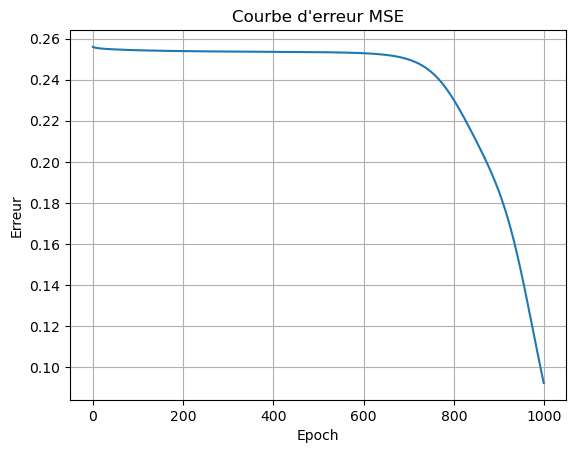

In [44]:

x_train = np.array([[[0, 0]], [[0, 1]], [[1, 0]], [[1, 1]]])
y_train = np.array([[[0]], [[1]], [[1]], [[0]]])

# Création du réseau
net = Network()
net.add(FCLayer(2, 3))                 
net.add(ActivationLayer(tanh, tanh_prime))         
net.add(FCLayer(3, 1))                            
net.add(ActivationLayer(sigmoid, sigmoid_prime))   


net.use(mse, mse_prime)

net.fit(x_train, y_train, epochs=1000, learning_rate=0.1)

print("Résultats après entraînement:")
for i in range(len(x_train)):
    x = x_train[i][0]
    y_pred = out[i][0][0]
    print(f"Entrée: {x} → Prédiction brute: {y_pred:.4f} → Classe prédite: {int(y_pred > 0.5)}")

plt.plot(net.errors)
plt.title("Courbe d'erreur MSE")
plt.xlabel("Epoch")
plt.ylabel("Erreur")
plt.grid()
plt.show()
